**Predicting The Diagnosis Of Diabetes In Patients Based On Their Glucose And Insulin Levels**

*Introduction*

This project will analyze a dataset concerning diabetes and attempt to diagnose the disease in individuals by comparing their glucose and insulin levels to the individuals included in the dataset. Upon digesting food, the body breaks down the food into its base components, including sugar. This sugar will enter the blood and affect the blood glucose levels. Healthy individuals will produce insulin in response to this increase in blood sugar, whereas those with diabetes will have little to no production of insulin by the pancreas and thus be unable to naturally regulate the glucose levels. 

There are 2 types of diabetes: Type 1 is an autoimmune disease where the pancreas cannot produce its own insulin, Type 2 is more common and relates to higher production levels of insulin. When affected by this illness, the insulin production is very low or improperly used by the body and leads to abnormal levels of blood sugar. 
The question we will be answering in our project is: **Are we able to predict diabetes in an individual, solely based on their glucose and insulin levels?**

The dataset chosen was originally from the National Institute of Diabetes and Digestive and Kidney Diseases, then derived from Kaggle (https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset). It displays different variables that play a role in or indicate whether or not an individual is diabetic. In the raw dataset, there are nine columns, all containing numerical values, most of them integers. It is important to note the only dependent variable, the  ‘outcome’ column, which expresses the result of the prediction through the legend: 1 = yes, the individual is diabetic and 0 = no, the individual is not diabetic. One limitation of the study is the limited diversity in sampling, as the subjects are all females over 21 years old of Pima Indian heritage.


*Preliminary Data Exploration*

In [95]:
library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
options(repr.matrix.max.rows = 6)


In [96]:
# Preliminary Exploratory Data Analysis: Read Data into R
diabetes_data <- read.csv("diabetes.csv")
diabetes_data

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1
1,93,70,31,0,30.4,0.315,23,0


In [109]:
# Preliminary Exploratory Data Analysis: Clean and Wrangle Data

diabetes_data$Patient_number <- seq.int(nrow(diabetes_data)) 

diabetes_select <- select(diabetes_data, Patient_number, Glucose, Insulin, Outcome)
diabetes_filter <- diabetes_select |>
    filter(!(Outcome == 0 & Insulin == 0))


diabetes_filter


Patient_number,Glucose,Insulin,Outcome
<int>,<int>,<int>,<int>
1,148,0,1
3,183,0,1
4,89,94,0
⋮,⋮,⋮,⋮
764,101,180,0
766,121,112,0
767,126,0,1


In [110]:
# # Preliminary Exploratory Data Analysis: Training and Testing Data

diabetes_select <- mutate(diabetes_filter, Outcome=as_factor(Outcome))
diabetes_split <- initial_split(diabetes_filter, prop = 0.75, strata = Outcome)  
diabetes_train <- training(diabetes_split)   
diabetes_test <- testing(diabetes_split)


In [111]:
#Exploratory Data Analysis: Organize the training data into tables
diabetes_count_case<-group_by(diabetes_train, Outcome) |>
    summarize(number_of_cases=n())
diabetes_count_case

diabetes_indicator_mean<-group_by(diabetes_train, Outcome) |>
    summarize(across(Glucose:Insulin, mean))
diabetes_indicator_mean


Outcome,number_of_cases
<int>,<int>
0,198
1,201


Outcome,Glucose,Insulin
<int>,<dbl>,<dbl>
0,110.8333,129.44949
1,141.3483,95.19403


Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


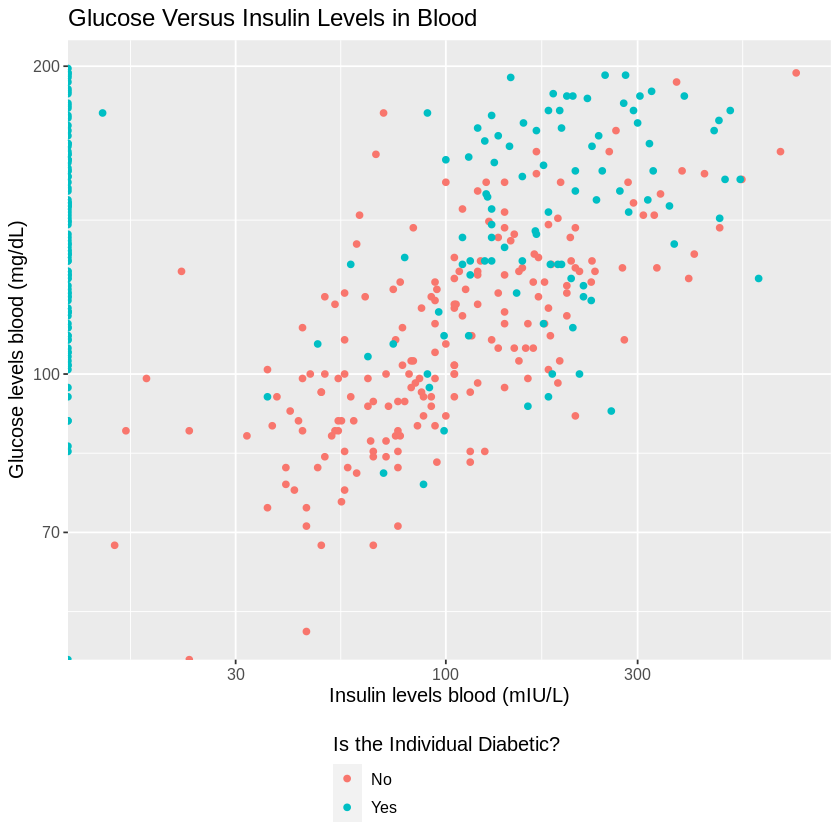

In [112]:
# Preliminary Exploratory Data Analysis: Visualize the training data

diabetes_train_plot <-ggplot (diabetes_train, aes(x = Insulin, 
                     y = Glucose, 
                     color = as_factor(Outcome))) +
geom_point(stat = "identity") +
    labs(x="Insulin levels blood (mIU/L)", y="Glucose levels blood (mg/dL)", color = "Is the Individual Diabetic?") + 
    theme(text = element_text(size = 12),
        legend.position = "bottom",
        legend.direction = "vertical") +
    scale_fill_discrete(name = "Diabetic?", labels = c("No", "Yes")) +
    scale_x_log10(labels = comma) +
    scale_y_log10(labels = comma) +
    ggtitle("Glucose Versus Insulin Levels in Blood") +
    scale_color_discrete(labels = c("No", "Yes"))

diabetes_train_plot



*Methods*

In order to determine the diagnosis of diabetes in new patients, we will compare their glucose and insulin values to individuals with a known diagnosis. As previously mentioned, diabetes is associated with low to no insulin in the blood, regardless of increased blood glucose levels. Therefore, these two data columns will be selected, as well as the individual's outcome, which details whether or not they have diabetes. Also, we will filter the individuals in the dataset who are non-diabetic, but have a insulin level of zero. The cause of this is unknown since resting insulin levels should never be below zero in healthy individuals. Later, we will scale the data in order to accurately compare the two values, and train our classifier with the training set. We will then perform a classification analysis with the testing set to determine whether or not the three new individuals present a potential for being diabetic based on their glucose and insulin levels. 

The data will be visualized as a scatter plot in order to clearly visualize a trend between glucose and insulin levels. The points will be coloured based on the individual’s outcome from the dataset. The three new individuals will be plotted against the known individuals from the dataset. The analysis will compare their values with the neighbors in order to predict the diagnosis. 

The three new individuals will include one that is diabetic and one that is not based on literature-supported glucose and insulin levels, while the third individual will have arbitrary values. Normal insulin and glucose levels when fasting would be respectively < 17 mIU/L and around 70-100 mg/dL , while for diabetic individuals it is around 7mml/L and 140mg/dL. 


*Expected Outcomes and Significance*

From this project, we expect to find that insulin and glucose levels are correlated with a diagnosis of diabetes. There should be two groups of data, based on whether the individual is diabetic. In non-diabetics, we predict insulin and glucose to have a positive relationship indicating that insulin levels rise in order to regulate glucose. However, in diabetic individuals, there should be no relationship since they can produce little to no insulin to regulate rising glucose levels. This data analysis is relevant in medicine, since it allows predictions to be made with limited testing.

It is important to note that diabetes is dependent on numerous variables and that by classifying new individuals against this dataset, it may indicate a possibility of diabetes, not a confirmation of diabetes. Further testing would be required.
The future applications of this analysis include incorporating more data on the individuals in order to not only predict if the individual has diabetes, but also the type of diabetes. Additionally, in subsequent research we can use different columns of the data set to see the impact of those variables on the correlation value and whether they can help predict with more accuracy.


*References/ Links*

https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380

https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=167&contentid=insulin_total_free

https://www.cdc.gov/diabetes/basics/getting-tested.html

https://www.diabetesselfmanagement.com/blog/do-you-know-your-insulin-level/
